In [1]:
# 패키지 로딩하기
import os
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# 필요한 함수 구축하기

# 이미지 파일에서 얼굴 영역을 가져오는 함수
def get_gropped_face(image_file):
    image          = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d     = face_locations[0]
    cropped_face   = image[a : c, d : b, : ]
    
    return cropped_face

# 얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        image_path = os.path.join(dir_path, file)
        face       = get_gropped_face(image_path)
        embedding  = get_face_embedding(face)
        
        if len(embedding) > 0: # 얼굴영역 face가 제대로 detect 되지 않으면 len(embedding) == 0인 경우가 발생하므로 
                               # os.path.splitext(file)[0]에는 이미지 파일명에서 확장자를 제거한 이름이 담긴다.
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

# 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1] - embedding_dict[name2], ord = 2) # L1 distance은 ord = 1, L2 distance은 ord = 2

# name1과 name2의 거리를 비교하는 함수
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# name과 비슷한 얼굴 찾아주는 함수
def get_nearest_face(name, top = 5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces  = sorted(embedding_dict.items(), key = lambda x: sort_key_func(x[0]))
    
    for i in range(top + 1):
        if i == 0: # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외한다.
            continue
        if sorted_faces[i]:
            print("순위 {} : 이름({}), 거리({})".format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

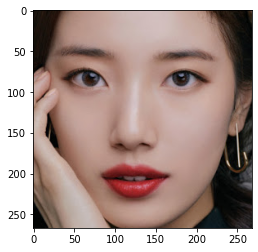

In [3]:
# 얼굴 영역을 잘 찾아오는지 테스트 해보기
image_path   = os.getenv("HOME") + "/aiffel/face_embedding/images_이동훈1/수지.jpg" # 파일경로 + 파일명.확장자
cropped_face = get_gropped_face(image_path)                                        # 이미지 파일에서 얼굴영역만 가져오기
plt.imshow(cropped_face)                                                           # 결과 출력

[[[115 114 120]
  [115 114 120]
  [115 114 120]
  ...
  [ 94 105 109]
  [101 112 116]
  [107 116 121]]

 [[115 114 120]
  [115 114 120]
  [116 115 121]
  ...
  [ 49  62  71]
  [ 63  73  83]
  [ 72  82  92]]

 [[115 114 120]
  [116 115 121]
  [116 115 121]
  ...
  [ 35  47  61]
  [ 37  51  64]
  [ 38  52  65]]

 ...

 [[  9  17  20]
  [ 13  21  24]
  [ 13  21  24]
  ...
  [ 10  23  29]
  [ 10  23  29]
  [ 10  23  29]]

 [[ 15  23  26]
  [  8  16  19]
  [  9  17  20]
  ...
  [ 10  23  29]
  [ 10  23  29]
  [ 10  23  29]]

 [[ 14  22  25]
  [  4  12  15]
  [ 14  22  25]
  ...
  [  7  20  26]
  [  8  21  27]
  [  9  22  28]]]


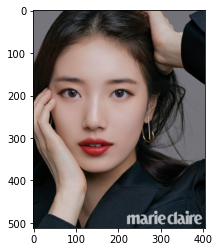

In [20]:
# 잘 가져왔는지 비교하기 위해 원본 이미지 보기
temp_image = face_recognition.load_image_file(image_path) # 이미지 읽어오기
print(temp_image)                                         # 이미지 출력
plt.imshow(temp_image)                                    # 이미지 출력
# 컴퓨터에겐 데이터지만 우리에겐 이미지이다.

In [28]:
# 위에서 본 사진의 데이터를 임베딩하기
embedding = get_face_embedding(cropped_face) # 얼굴영역만 자른 이미지 데이터를 임베딩하기
embedding                                    # 결과 출력

[array([-1.76812291e-01,  9.84231904e-02,  1.04191244e-01, -1.31875858e-01,
        -1.27912894e-01, -6.00839704e-02, -1.39113337e-01, -1.46641970e-01,
         1.19901247e-01, -1.89781278e-01,  2.24647909e-01, -5.41267581e-02,
        -1.52898431e-01, -4.87582050e-02, -2.33802870e-02,  2.08003789e-01,
        -2.02846244e-01, -1.56375900e-01,  5.64389117e-03,  4.29403111e-02,
         1.16520427e-01,  6.16011955e-02, -2.94301193e-02,  3.46064866e-02,
        -1.54455051e-01, -3.22187811e-01, -1.45694152e-01, -1.30625917e-02,
        -9.72795263e-02, -6.11196086e-02, -3.19275446e-02,  3.73143516e-02,
        -1.50874227e-01,  2.76914425e-02, -9.80765745e-03,  1.19569704e-01,
         2.61103678e-02, -5.65496311e-02,  1.02448530e-01,  4.69079576e-02,
        -3.16795439e-01,  9.61144194e-02,  7.91832060e-02,  2.17266306e-01,
         2.01700360e-01, -5.88751622e-02,  2.14807503e-03, -1.49407387e-01,
         1.12728313e-01, -1.83292344e-01,  5.82043733e-03,  1.34206235e-01,
         7.8

### 내 사진을 2개(다른 각도)를 찍어서 다른 폴더에 저장한 후 2번 실습을 진행함

In [5]:
dir_path       = os.getenv("HOME") + "/aiffel/face_embedding/images_이동훈1" # 나의 정면 사진이 들어있는 폴더 경로
embedding_dict = get_face_embedding_dict(dir_path)                          # 폴더 안에 있는 모든 파일을 임베딩 하기

In [6]:
embedding_dict["수지"] # 폴더안의 사진이 임베딩이 잘 되었는지 확인하기 위해 하나의 파일의 임베딩을 불러온다

array([-1.76812291e-01,  9.84231904e-02,  1.04191244e-01, -1.31875858e-01,
       -1.27912894e-01, -6.00839704e-02, -1.39113337e-01, -1.46641970e-01,
        1.19901247e-01, -1.89781278e-01,  2.24647909e-01, -5.41267581e-02,
       -1.52898431e-01, -4.87582050e-02, -2.33802870e-02,  2.08003789e-01,
       -2.02846244e-01, -1.56375900e-01,  5.64389117e-03,  4.29403111e-02,
        1.16520427e-01,  6.16011955e-02, -2.94301193e-02,  3.46064866e-02,
       -1.54455051e-01, -3.22187811e-01, -1.45694152e-01, -1.30625917e-02,
       -9.72795263e-02, -6.11196086e-02, -3.19275446e-02,  3.73143516e-02,
       -1.50874227e-01,  2.76914425e-02, -9.80765745e-03,  1.19569704e-01,
        2.61103678e-02, -5.65496311e-02,  1.02448530e-01,  4.69079576e-02,
       -3.16795439e-01,  9.61144194e-02,  7.91832060e-02,  2.17266306e-01,
        2.01700360e-01, -5.88751622e-02,  2.14807503e-03, -1.49407387e-01,
        1.12728313e-01, -1.83292344e-01,  5.82043733e-03,  1.34206235e-01,
        7.83063471e-02,  

In [7]:
get_nearest_face("이동훈") # 나랑 가장 닮은 연예인을 5명을 불러온다.

순위 1 : 이름(이희준), 거리(0.38393903128999757)
순위 2 : 이름(b1a4진영), 거리(0.3989969313504162)
순위 3 : 이름(이용진), 거리(0.40122633280272235)
순위 4 : 이름(카이), 거리(0.41405126439217754)
순위 5 : 이름(유지태), 거리(0.42349191738457814)


In [8]:
dir_path_2     = os.getenv("HOME") + "/aiffel/face_embedding/images_이동훈2" # 측면 사진
embedding_dict = get_face_embedding_dict(dir_path_2)

In [9]:
get_nearest_face("이동훈") # 나랑 가장 닮은 연예인을 5명을 불러온다.

순위 1 : 이름(이용진), 거리(0.38457576538802735)
순위 2 : 이름(b1a4진영), 거리(0.40048984866673726)
순위 3 : 이름(이희준), 거리(0.40660545837566475)
순위 4 : 이름(카이), 거리(0.4207370804783926)
순위 5 : 이름(마동석), 거리(0.4241382971715535)


In [30]:
# 회고록
# 이번 코드는 짧은 셀을 이용한 것 같다.
# 그 이유는 이미 잘 만들어진 멋진 패키지가 있고, 그 패키지를 이용하여 우리가 필요로 하는 코드를 멋진 함수로 만들었기 때문이라고 생각한다.
# 최근 함수를 만드는 이유를 공부하고 바로 함수를 만드는 과제를 하면서 함수의 중요성과 편리성을 다시 느낀 것 같다.
# 비록 내가 설계하고 만든 함수는 아니여도 따라 쓰고, 이해하면서 나중에는 나도 필요한 함수를 만들어서 쉽게 사용할 수 있는 실력이 되면 좋겠다.
# 실습에 사용된 사진은 슬랙에 올려주신 280가량의 사진에 내사진을 더해서 실습을 진행하였고, 다양한 사진을 추가하거나 내 사진을 다른 각도로 찍어서
# 동일한 코드를 돌리면 닮은꼴 연예인 순위가 바뀌는 것에 대해 신기했다.
# 요약하자면 이번 과제에서 휼륭한 패키지를 알 수 있어서 좋았고, 패키지를 이용한 좋은 함수를 봐서 실력향상에 도움이 되었다고 생각한다.